In [81]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib
import seaborn as sns
import xgboost
import catboost
# fit a model and make predictions for the on the adult dataset
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import GradientBoostingClassifier

path = "C:\\Users\\syedasamreen\\Desktop\\adult.csv"
    

In [34]:
df = pd.read_csv("adult.csv")
df.shape
df.dtypes
df.isnull().sum()

(32561, 15)

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
country           object
salary            object
dtype: object

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
country           0
salary            0
dtype: int64

In [42]:
df['workclass'].value_counts()
df['occupation'].value_counts()
df['country'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [44]:
sns.countplot(df['salary'],palette='CMRmap',data=df)

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='salary', ylabel='count'>

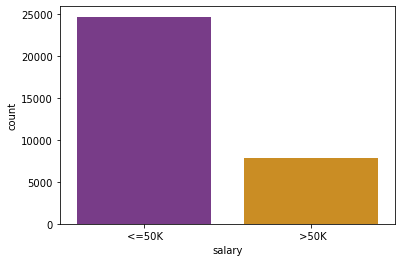

In [51]:
df['workclass'] = df['workclass'].replace("?","Private")
df['occupation'] = df['occupation'].replace("?","Proffesor")
df['country'] = df['country'].replace("?","United-States")

In [52]:
df.education = df.education.replace(['Preschool','1st-4th','5th-6th','7th-8th','9th','10th','11th','12th'],'school')
df.education = df.education.replace('Bachelors','Masters')
df.education = df.education.replace(['Assoc-voc','Assoc-acdm','Prof-school '], 'professional')
df.education = df.education.replace('Doctorate', ' HS-grad')
df.education = df.education.replace('Some-college')


In [55]:
df.tail(50)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
32511,25,Local-gov,514716,Bachelors,13,Never-married,Adm-clerical,Own-child,Black,Female,0,0,40,United-States,<=50K
32512,20,Private,270436,HS-grad,9,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,40,United-States,<=50K
32513,46,Private,42972,Masters,14,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,22,United-States,>50K
32514,40,Private,142657,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Black,Male,0,0,45,United-States,<=50K
32515,66,Federal-gov,47358,10th,6,Married-civ-spouse,Craft-repair,Husband,White,Male,3471,0,40,United-States,<=50K
32516,30,Private,176175,Assoc-voc,11,Divorced,Adm-clerical,Unmarried,White,Female,0,0,24,United-States,<=50K
32517,36,Private,131459,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
32518,57,Local-gov,110417,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,99999,0,40,United-States,>50K
32519,46,Private,364548,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,48,United-States,>50K
32520,27,Private,177398,HS-grad,9,Never-married,Other-service,Unmarried,White,Female,0,0,64,United-States,<=50K


In [57]:
df['education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

In [64]:
df.corr()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
education-num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
capital-gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
capital-loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
hours-per-week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


<AxesSubplot:>

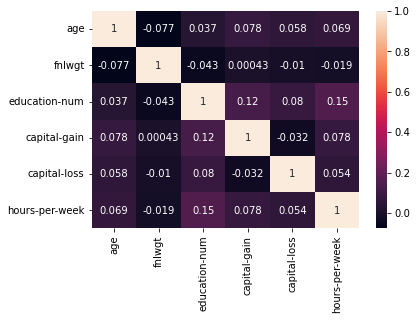

In [65]:
sns.heatmap(df.corr(),annot=True)

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'fnlwgt'}>],
       [<AxesSubplot:title={'center':'education-num'}>,
        <AxesSubplot:title={'center':'capital-gain'}>],
       [<AxesSubplot:title={'center':'capital-loss'}>,
        <AxesSubplot:title={'center':'hours-per-week'}>]], dtype=object)

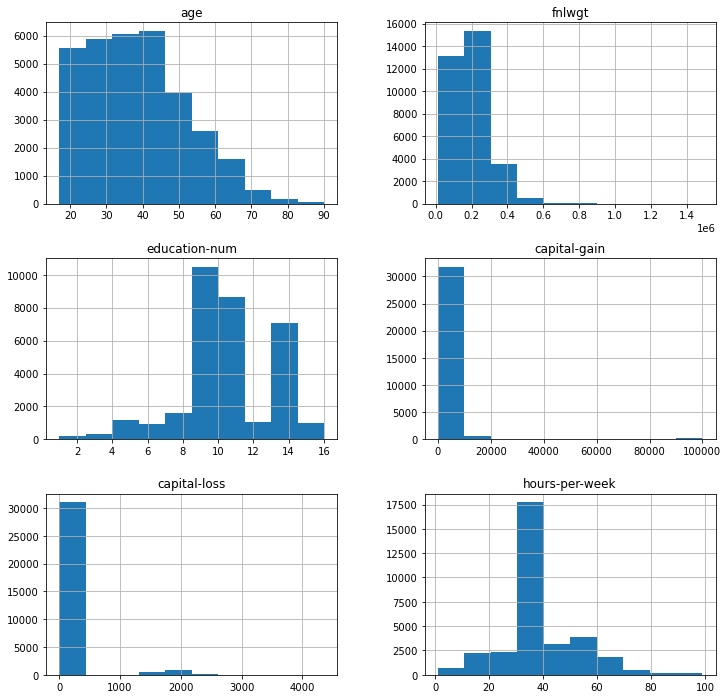

In [67]:
df.hist(figsize=(12,12),sharex =False)

age                  AxesSubplot(0.125,0.125;0.110714x0.755)
fnlwgt            AxesSubplot(0.257857,0.125;0.110714x0.755)
education-num     AxesSubplot(0.390714,0.125;0.110714x0.755)
capital-gain      AxesSubplot(0.523571,0.125;0.110714x0.755)
capital-loss      AxesSubplot(0.656429,0.125;0.110714x0.755)
hours-per-week    AxesSubplot(0.789286,0.125;0.110714x0.755)
dtype: object

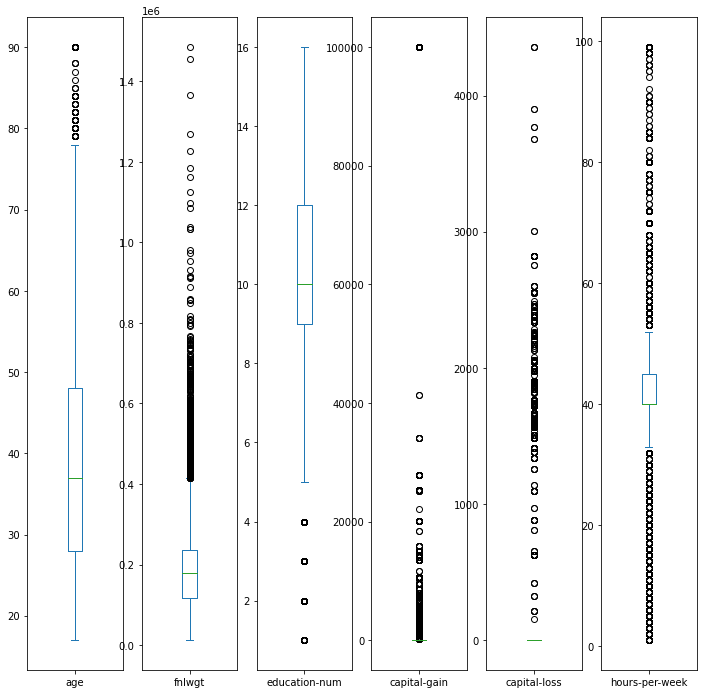

In [68]:
df.plot(kind='box',figsize = (12,12),sharex=False, subplots=True)

In [83]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
df1= df.copy()
df1 = df1.apply(LabelEncoder().fit_transform)
df1.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,22,7,2671,9,12,4,1,1,4,1,25,0,39,39,0
1,33,6,2926,9,12,2,4,0,4,1,0,0,12,39,0
2,21,4,14086,11,8,0,6,1,4,1,0,0,39,39,0
3,36,4,15336,1,6,2,6,0,2,1,0,0,39,39,0
4,11,4,19355,9,12,2,10,5,2,0,0,0,39,5,0


In [85]:
ss = StandardScaler().fit(df1.drop('salary',axis=1))

In [89]:
X= ss.transform(df1.drop('salary',axis=1))
y= df1['salary']

In [93]:
from sklearn.model_selection import train_test_split
x_train,y_train, x_test,y_test= train_test_split(X,y, test_size=0.3)

In [ ]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
# define the model evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model and collect the scores
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report the model performance
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))